### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [51]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt


1. display 5 columns from dataset

In [52]:
#1
data = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
data.head(5)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [53]:
#2
data.info()

#conclusion
# there is missing value on some coloumns such as race and admission.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [54]:
#3a


# Count unique values in the 'admission' column (including NaN)
admission_counts = data['admission'].value_counts(dropna=False)

print("\nAdmission counts:\n", admission_counts)


Admission counts:
 admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [55]:
#3b
# Count unique values in the 'race' column (including NaN)
race_counts = data['race'].value_counts(dropna=False)

print("Race counts:\n", race_counts)

Race counts:
 race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [56]:
#4
# Fill NaN values in 'admission' column with 'deny'
data['admission'].fillna('deny', inplace=True)

# Fill NaN values in 'race' column with 'other'
data['race'].fillna('other', inplace=True)

# Verify the changes by checking the value counts again
race_counts_filled = data['race'].value_counts(dropna=False)
admission_counts_filled = data['admission'].value_counts(dropna=False)

# Display the updated counts
print("Updated Race counts:\n", race_counts_filled)
print("\nUpdated Admission counts:\n", admission_counts_filled)


Updated Race counts:
 race
other       1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64

Updated Admission counts:
 admission
deny        5194
Admit        900
Waitlist     100
Name: count, dtype: int64


<ipython-input-56-bb6cb2f4193c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['admission'].fillna('deny', inplace=True)
<ipython-input-56-bb6cb2f4193c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [57]:
#5
# Check for any remaining missing values in the entire DataFrame
data.isnull().sum()




,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [58]:
# 6
data = data.drop('application_id', axis = 1)

7. show describe column and conclude what the insight is from that column

In [59]:
#7
data.describe()
#conclusion
# The dataset shows that applicants have a concentrated GPA around 3.25 with minimal variation, while GMAT scores are more widely spread around an average of 651. Most applicants have between 4 to 6 years of work experience, with a mean of 5 years and little variation.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

<Axes: title={'center': 'Admission Status by Major'}, ylabel='major'>

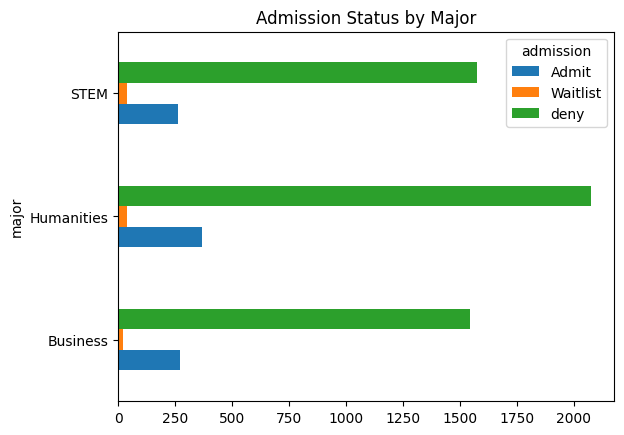

In [60]:
#8
data.groupby(['major', 'admission']).size().unstack().plot(kind='barh', stacked=False, title='Admission Status by Major')



9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

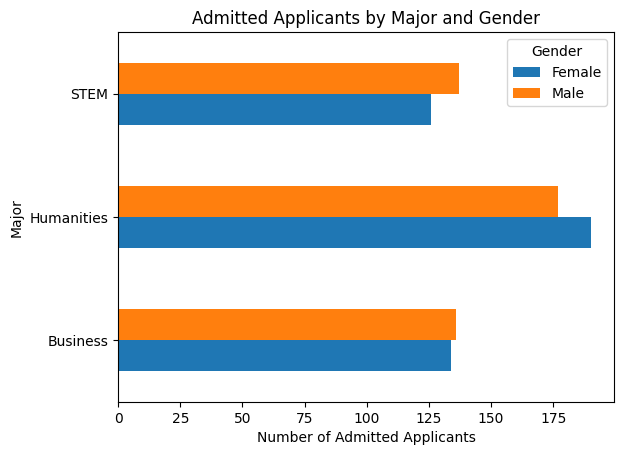

In [61]:
#9
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame named 'df'
url = "https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv"
df = pd.read_csv(url)

# Filter for admitted applicants only
admitted_df = df[df['admission'] == 'Admit']

# Group data by major and gender, then count the number of admitted applicants
grouped_df = admitted_df.groupby(['major', 'gender']).size().unstack()

# Plotting the horizontal bar chart
grouped_df.plot(kind='barh', stacked=False, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.title('Admitted Applicants by Major and Gender')
plt.legend(title='Gender')
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-62-39f78466b6b8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['gmat_bin', 'admission']).size().unstack().plot(kind='bar', stacked=True, title='Admission Status by GMAT Score Range')


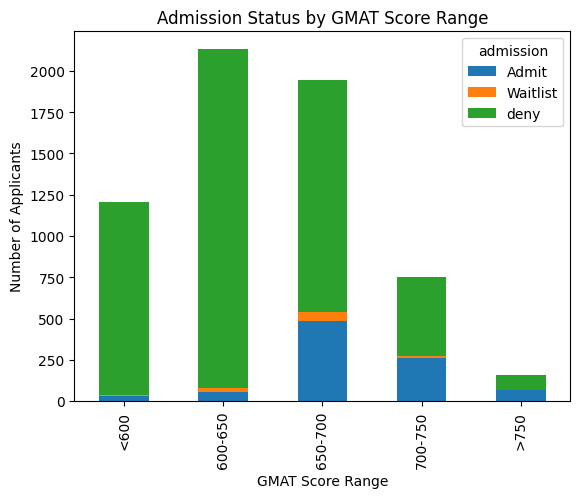

In [62]:
data['gmat_bin'] = pd.cut(data['gmat'], bins=[0, 600, 650, 700, 750, 800], labels=['<600', '600-650', '650-700', '700-750', '>750'])
data.groupby(['gmat_bin', 'admission']).size().unstack().plot(kind='bar', stacked=True, title='Admission Status by GMAT Score Range')
plt.xlabel('GMAT Score Range')
plt.ylabel('Number of Applicants')
plt.show()

# This code visualizes the relationship between GMAT scores and admission status. It bins GMAT scores into different ranges and then creates a stacked bar chart showing the number of admits, denies, and waitlists for each bin. This visualization can provide insights into how GMAT scores influence admission decisions.

11. create your own insightful visualization and explain it in at least 2 sentences

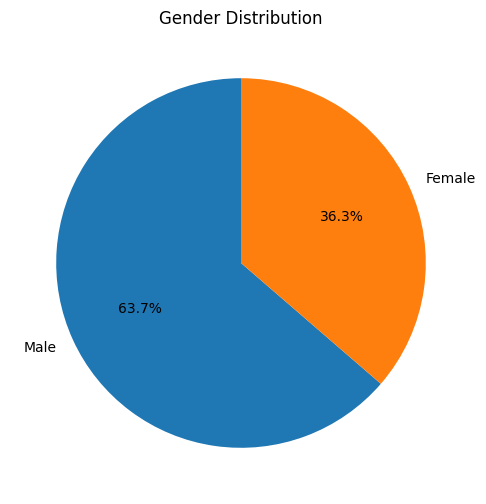

In [63]:
#11
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# This code creates a pie chart illustrating the distribution of genders within the dataset. It calculates the count of each gender, and then plots these counts as a pie chart with percentages for each slice.

12. encode categorical columns and display the results

In [64]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['gpa'] = encoder.fit_transform(data['gpa'])
data['gender'] = encoder.fit_transform(data['gender'])
data['international'] = encoder.fit_transform(data['international'])
data['major'] = encoder.fit_transform(data['major'])
data['race'] = encoder.fit_transform(data['race'])
data['gmat'] = encoder.fit_transform(data['gmat'])
data['work_exp'] = encoder.fit_transform(data['work_exp'])
data['work_industry'] = encoder.fit_transform(data['work_industry'])
data.drop('gmat_bin',axis=1,inplace=True)

data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,55,0,0,5,2,3,Admit
1,1,0,53,1,1,11,4,6,deny
2,0,1,55,0,5,14,4,13,Admit
3,1,0,72,2,1,12,5,13,deny
4,1,0,60,2,2,2,4,1,deny


In [65]:
#12b
#encode y
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['admission'] = encoder.fit_transform(data['admission'])
data['admission'] = data['admission'].replace({2: 1})
data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,55,0,0,5,2,3,0
1,1,0,53,1,1,11,4,6,1
2,0,1,55,0,5,14,4,13,0
3,1,0,72,2,1,12,5,13,1
4,1,0,60,2,2,2,4,1,1


13. create a heatmap to see the correlation and List item


explain the conclusion

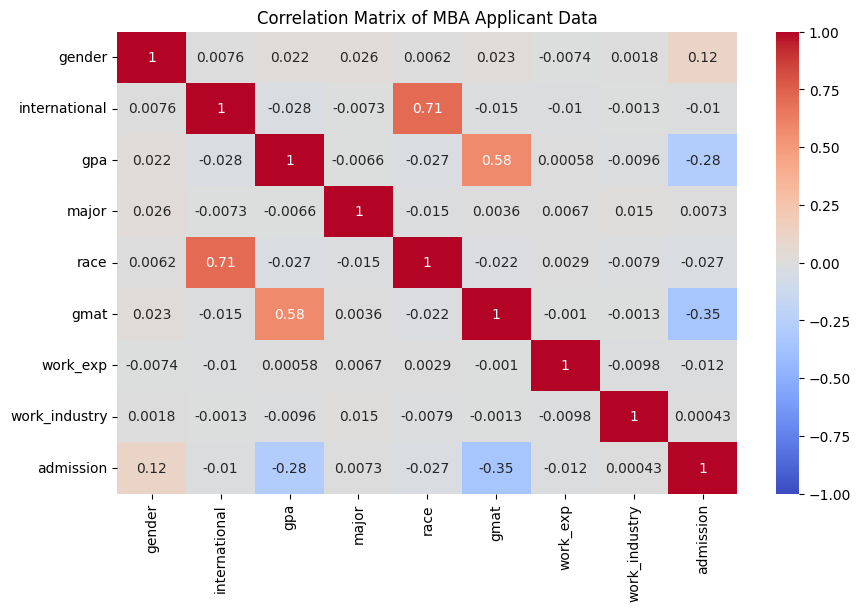

In [66]:
#13
import seaborn as sns
corr_matrix = data.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()


#Conclusion


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [69]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = data['admission']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

mean = data['gpa'].mean()
# print(mean)
predicted_role_encoded = clf.predict([[0,0,mean,0,0,580,2,3]])
predicted_role = encoder.inverse_transform(predicted_role_encoded)

print(f"Predicted role for the character: {predicted_role[0]}")


Accuracy of the model: 0.8095238095238095
Predicted role for the character: Admit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
